In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
file_path = 'C:\\internships\\Elevate labs intern\\task5\\Titanic.csv'

In [14]:
df = pd.read_csv(file_path,encoding='iso-8859-1')

In [15]:
print(df.to_string()) 

     PassengerId  Pclass                                                             Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0            892       3                                                 Kelly, Mr. James    male  34.50      0      0              330911    7.8292              NaN        Q
1            893       3                                 Wilkes, Mrs. James (Ellen Needs)  female  47.00      1      0              363272    7.0000              NaN        S
2            894       2                                        Myles, Mr. Thomas Francis    male  62.00      0      0              240276    9.6875              NaN        Q
3            895       3                                                 Wirz, Mr. Albert    male  27.00      0      0              315154    8.6625              NaN        S
4            896       3                     Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.00      1      1       

In [16]:
print("Data Preview:")
print(df.describe())

Data Preview:
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   39.000000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [17]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:

## DC1: Data Inventory and Source Identification
print("Dataset Overview:")
print(df.info())
print("\nColumns and Data Types:")
print(df.dtypes)
print("\nSample Data:")

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None

Columns and Data Types:
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked

In [19]:
## DC2: Data Cleaning and Preprocessing
# Removing duplicates
df.drop_duplicates(inplace=True)
# Check for missing values
print(df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [20]:
df[df.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:

# Handling missing values
missing_values = df.isnull().sum()
print("Missing Values Per Column:\n", missing_values[missing_values > 0])

Missing Values Per Column:
 Age       86
Fare       1
Cabin    327
dtype: int64


In [22]:
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

In [23]:
# Fill missing categorical values with mode
for col in df.select_dtypes(include=['category', 'object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [24]:
print("\nMissing values after treatment:\n", df.isnull().sum().sum())


Missing values after treatment:
 0


In [25]:

df.shape

(418, 11)

In [26]:
df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [27]:
# Handling outliers using IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter numerical columns for outlier removal
numerical_cols = df.select_dtypes(include=np.number).columns

# Removing outliers only from numerical columns
df_filtered = df[~((df[numerical_cols] < lower_bound[numerical_cols]) | (df[numerical_cols] > upper_bound[numerical_cols])).any(axis=1)]

df = df_filtered

In [28]:
df.dropna()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,B57 B59 B63 B66,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,B57 B59 B63 B66,Q
...,...,...,...,...,...,...,...,...,...,...,...
410,1302,3,"Naughton, Miss. Hannah",female,27.0,0,0,365237,7.7500,B57 B59 B63 B66,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,B57 B59 B63 B66,S
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S


In [29]:
df.duplicated().sum()
df.count()

PassengerId    281
Pclass         281
Name           281
Sex            281
Age            281
SibSp          281
Parch          281
Ticket         281
Fare           281
Cabin          281
Embarked       281
dtype: int64

In [30]:
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,B57 B59 B63 B66,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,B57 B59 B63 B66,Q


In [31]:
df.value_counts()
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,281.000000,281.000000,281.000000,281.000000,281.0,281.000000
mean,1094.761566,2.448399,28.272242,0.213523,0.0,15.618090
std,119.984865,0.754751,7.876031,0.475051,0.0,12.818909
min,892.000000,1.000000,12.000000,0.000000,0.0,0.000000
25%,991.000000,2.000000,24.000000,0.000000,0.0,7.775000
50%,1097.000000,3.000000,27.000000,0.000000,0.0,8.662500
75%,1195.000000,3.000000,30.000000,0.000000,0.0,21.000000
max,1308.000000,3.000000,54.000000,2.000000,0.0,65.000000


In [38]:
print(df.to_string()) 

     PassengerId  Pclass                                                            Name     Sex   Age  SibSp  Parch              Ticket     Fare            Cabin Embarked
0            892       3                                                Kelly, Mr. James    male  34.5      0      0              330911   7.8292  B57 B59 B63 B66        Q
1            893       3                                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0              363272   7.0000  B57 B59 B63 B66        S
3            895       3                                                Wirz, Mr. Albert    male  27.0      0      0              315154   8.6625  B57 B59 B63 B66        S
5            897       3                                      Svensson, Mr. Johan Cervin    male  14.0      0      0                7538   9.2250  B57 B59 B63 B66        S
6            898       3                                            Connolly, Miss. Kate  female  30.0      0      0              330972   7

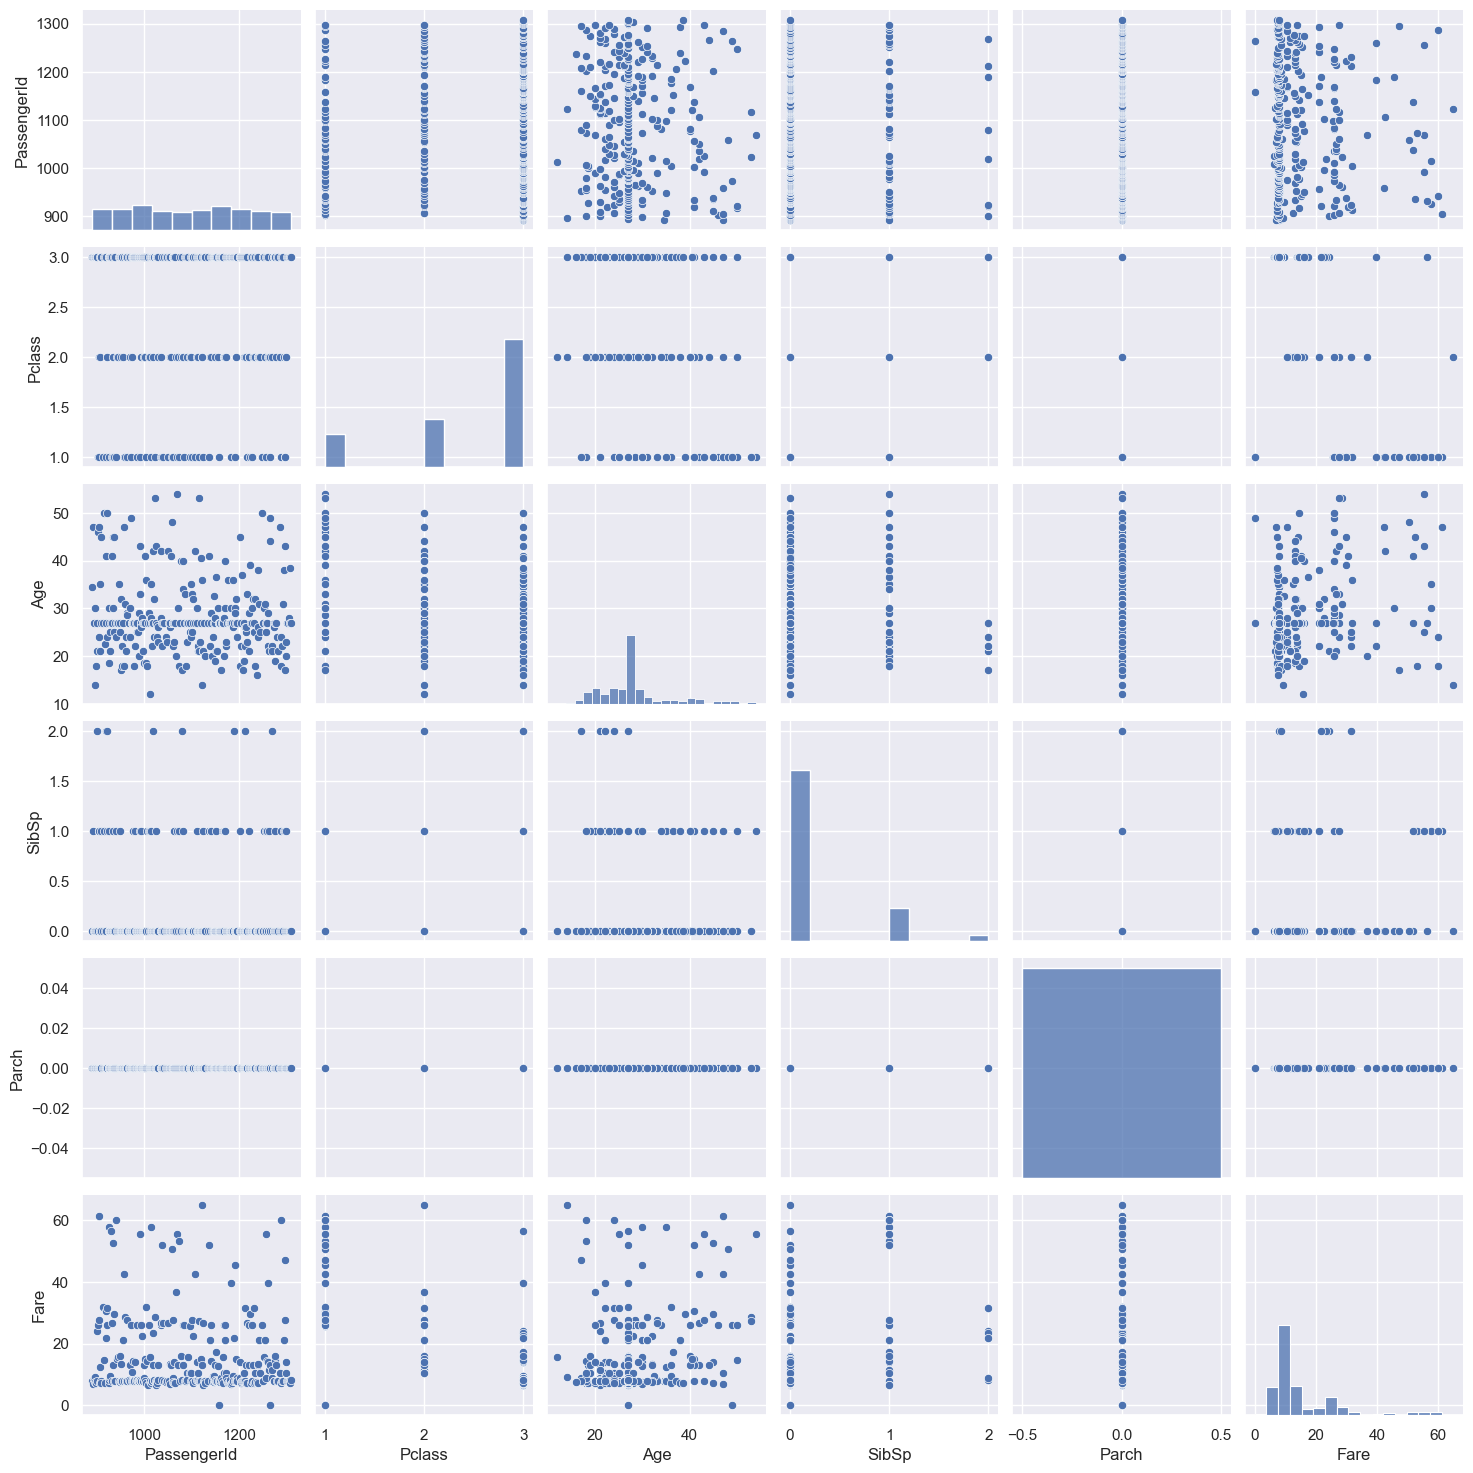

In [87]:
sns.pairplot(df)

c:\Users\shaik\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  This is separate from the ipykernel package so we can avoid doing imports until


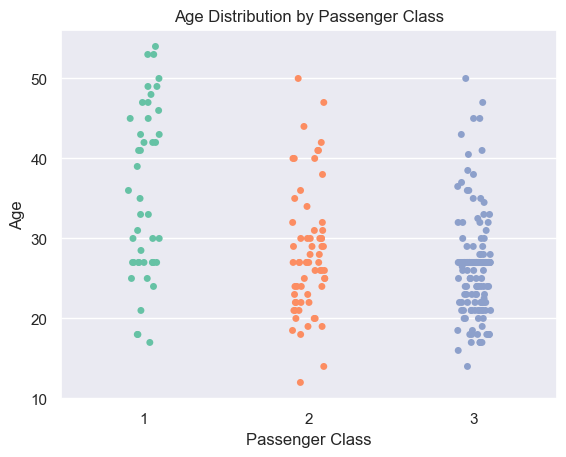

In [39]:
sns.set()
%matplotlib inline
sns.stripplot(x='Pclass', y='Age', data=df, jitter=True, palette='Set2')
plt.title('Age Distribution by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Age')
plt.show()

In [86]:

## DC3: Data Analysis and Visualization
# Correlation matrix
#Gender_Survived data set 
path = pd.read_csv("C:\\internships\\Elevate labs intern\\task5\\gender_submission.csv")
print(path.to_string())


     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
5            897         0
6            898         1
7            899         0
8            900         1
9            901         0
10           902         0
11           903         0
12           904         1
13           905         0
14           906         1
15           907         1
16           908         0
17           909         0
18           910         1
19           911         1
20           912         0
21           913         0
22           914         1
23           915         0
24           916         1
25           917         0
26           918         1
27           919         0
28           920         0
29           921         0
30           922         0
31           923         0
32           924         1
33           925         1
34           926         0
35           927         0
3

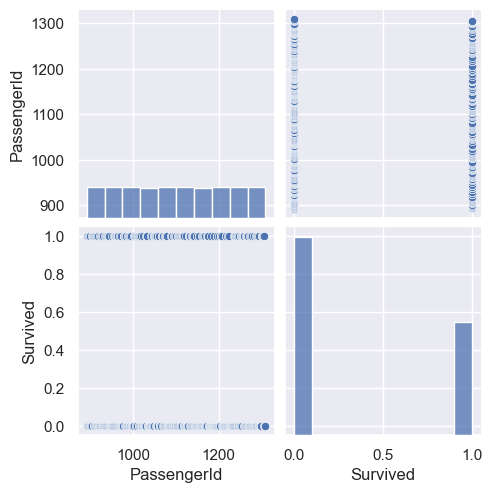

In [64]:
sns.pairplot(path)

<AxesSubplot:>

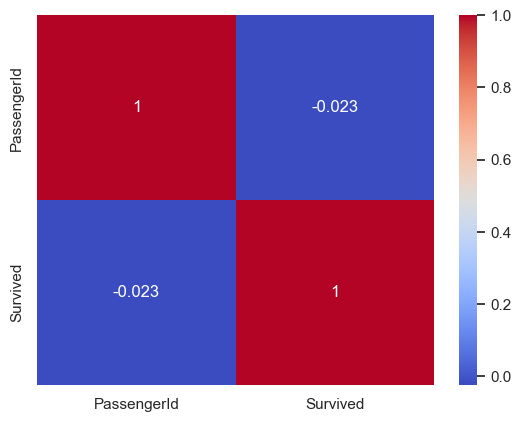

In [65]:
sns.heatmap(path.corr(), annot=True, cmap='coolwarm')

In [72]:
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

(array([[  0.,   0.,   0.,   0.,   0.,   0.,  25., 131., 131., 131.],
        [418.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0. ,  130.9,  261.8,  392.7,  523.6,  654.5,  785.4,  916.3,
        1047.2, 1178.1, 1309. ]),
 <a list of 2 BarContainer objects>)

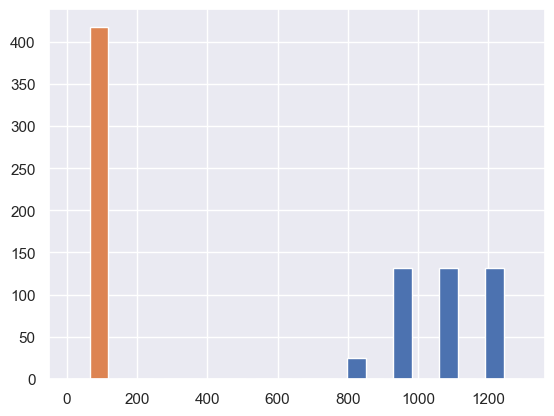

In [73]:
plt.hist(path)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ad35335390>,
 'caps': [<matplotlib.lines.Line2D at 0x1ad32f717f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ad35335048>,
 'medians': [<matplotlib.lines.Line2D at 0x1ad35335ef0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1ad32765d68>,
 'means': []}

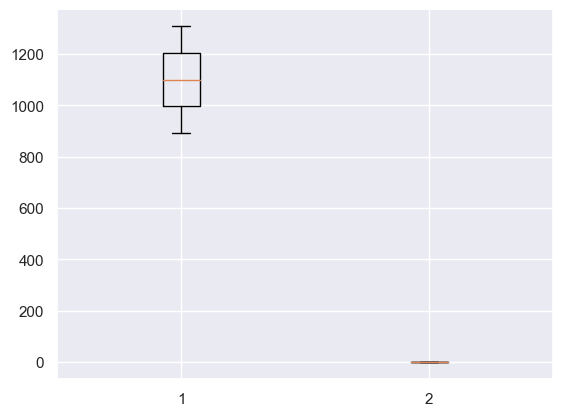

In [74]:
plt.boxplot(path)

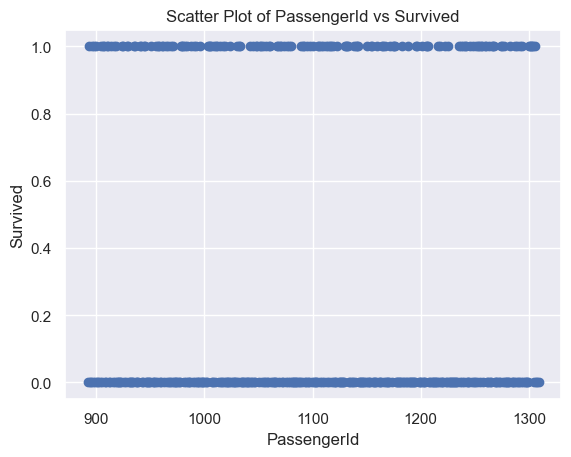

In [76]:
plt.scatter(path['PassengerId'], path['Survived']); plt.xlabel('PassengerId'); plt.ylabel('Survived'); plt.title('Scatter Plot of PassengerId vs Survived'); plt.show()

In [77]:
merge_df = pd.merge(df, path, on='PassengerId', how='inner')
print(merge_df.to_string())

     PassengerId  Pclass                                                            Name     Sex   Age  SibSp  Parch              Ticket     Fare            Cabin Embarked  Survived
0            892       3                                                Kelly, Mr. James    male  34.5      0      0              330911   7.8292  B57 B59 B63 B66        Q         0
1            893       3                                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0              363272   7.0000  B57 B59 B63 B66        S         1
2            895       3                                                Wirz, Mr. Albert    male  27.0      0      0              315154   8.6625  B57 B59 B63 B66        S         0
3            897       3                                      Svensson, Mr. Johan Cervin    male  14.0      0      0                7538   9.2250  B57 B59 B63 B66        S         0
4            898       3                                            Connolly, Miss. Kate  

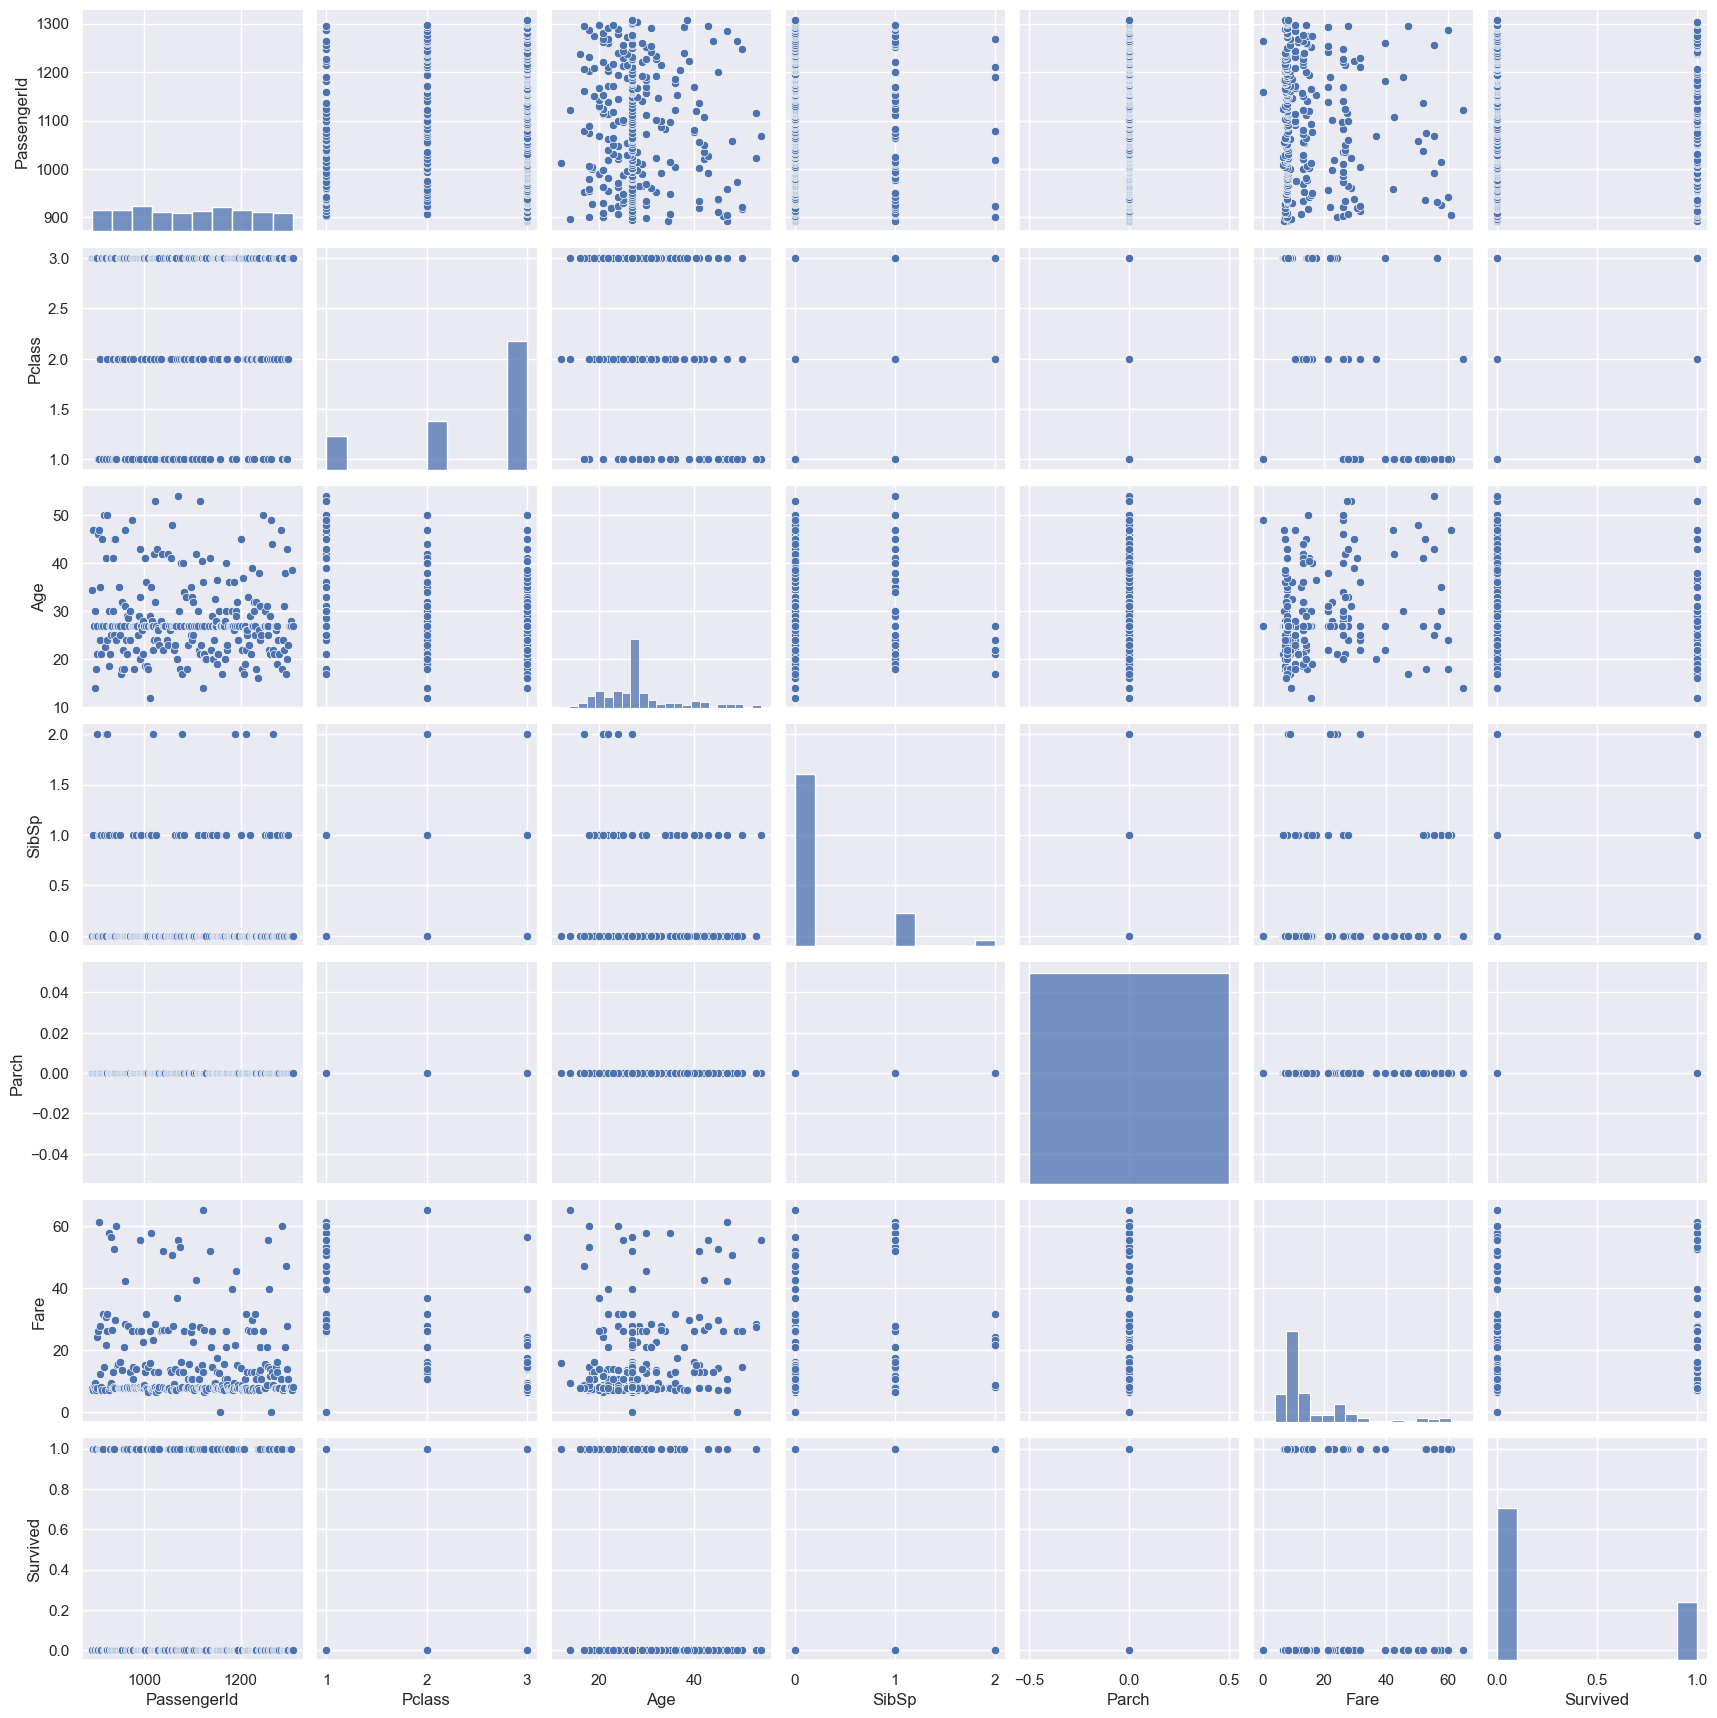

In [78]:
sns.pairplot(merge_df)

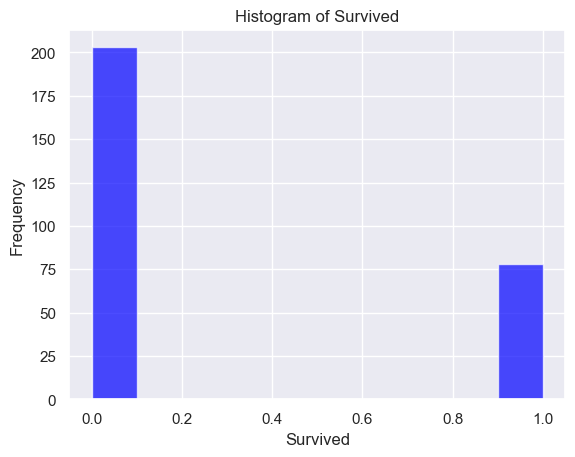

In [104]:
np.average(merge_df['Survived'])
plt.hist(merge_df['Survived'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Survived')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Age Distribution of Passengers')

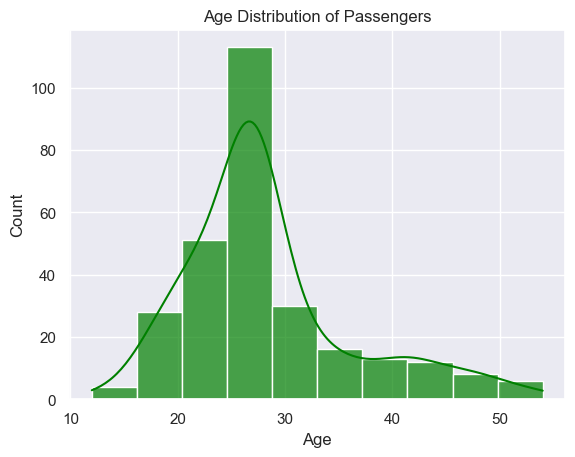

In [89]:
np.average(merge_df['Age'])
sns.histplot(merge_df['Age'], bins=10, kde=True, color='green', alpha=0.7)
plt.title('Age Distribution of Passengers')

In [94]:

np.count_nonzero(merge_df['Survived'] == 1)
np.count_nonzero(merge_df['Survived'] == 0)

203

In [93]:
np.count_nonzero(merge_df['Survived'] == 1)

78

In [96]:
np.count_nonzero(merge_df['Survived'] == 0)

203

In [98]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 0 to 416
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  281 non-null    int64  
 1   Pclass       281 non-null    int64  
 2   Name         281 non-null    object 
 3   Sex          281 non-null    object 
 4   Age          281 non-null    float64
 5   SibSp        281 non-null    int64  
 6   Parch        281 non-null    int64  
 7   Ticket       281 non-null    object 
 8   Fare         281 non-null    float64
 9   Cabin        281 non-null    object 
 10  Embarked     281 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.3+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,281.000000,281.000000,281.000000,281.000000,281.0,281.000000
mean,1094.761566,2.448399,28.272242,0.213523,0.0,15.618090
std,119.984865,0.754751,7.876031,0.475051,0.0,12.818909
min,892.000000,1.000000,12.000000,0.000000,0.0,0.000000
25%,991.000000,2.000000,24.000000,0.000000,0.0,7.775000
50%,1097.000000,3.000000,27.000000,0.000000,0.0,8.662500
75%,1195.000000,3.000000,30.000000,0.000000,0.0,21.000000
max,1308.000000,3.000000,54.000000,2.000000,0.0,65.000000


Text(0, 0.5, 'Survived')

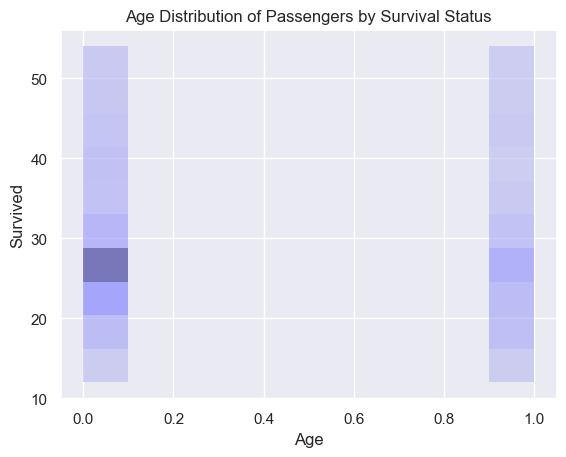

In [99]:
sns.histplot(merge_df, x='Survived', y='Age', bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Age Distribution of Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0, 0.5, 'Survived')

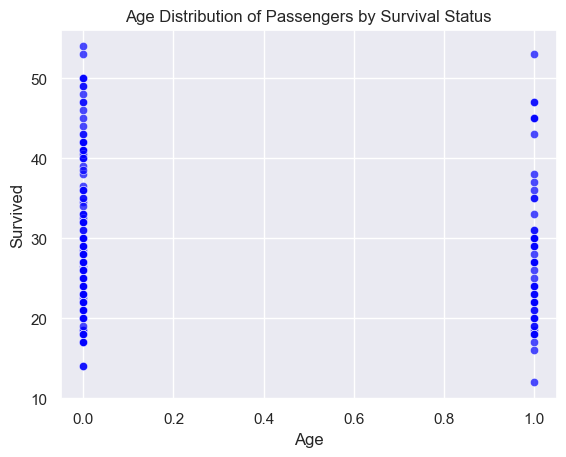

In [101]:
sns.scatterplot(data=merge_df, x='Survived', y='Age', color='blue', alpha=0.7)
plt.title('Age Distribution of Passengers by Survival Status')
plt.xlabel('Age')
plt.ylabel('Survived')

Text(0.5, 1.0, 'Survival Count by Passenger Class')

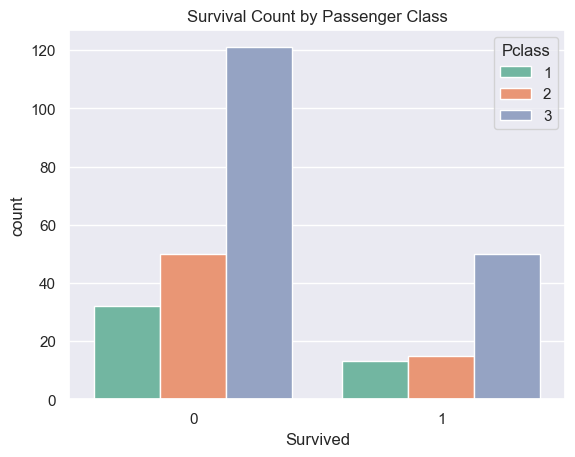

In [102]:
sns.countplot(data=merge_df, x='Survived', hue='Pclass', palette='Set2')
plt.title('Survival Count by Passenger Class')

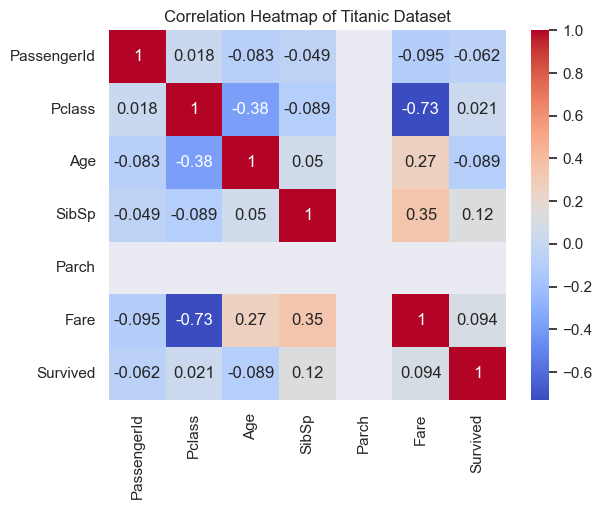

In [103]:
sns.heatmap(merge_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Titanic Dataset')
plt.show()

Text(0.5, 1.0, 'Boxplot of Age by Passenger Class')

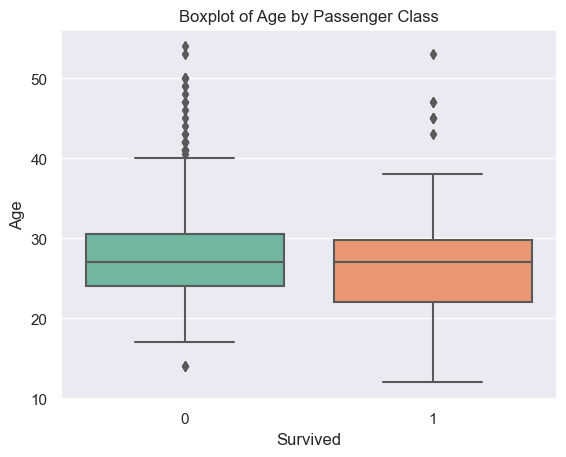

In [105]:
sns.boxplot(x='Survived', y='Age', data=merge_df, palette='Set2')
plt.title('Boxplot of Age by Passenger Class')

Text(0.5, 1.0, 'Survival Count by Passenger Class')

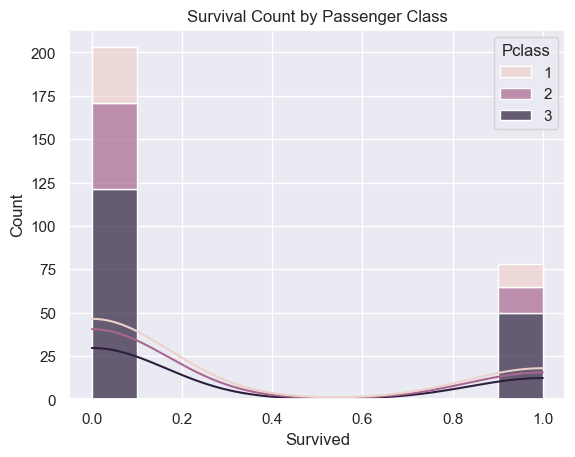

In [106]:
sns.histplot(merge_df, x='Survived', hue='Pclass', multiple='stack', bins=10, kde=True, color='blue', alpha=0.7)
plt.title('Survival Count by Passenger Class')